# Getting started

## One time setup 

You should have cloned the `aeon_mecha_de` folder as follows:

```
cd 
mkdir repos
cd repos
git clone https://gitlab.com/sainsbury-wellcome-centre/delab/arena/aeon_mecha_de.git
```

You should also have [installed Miniconda](https://docs.conda.io/en/latest/miniconda.html) or Anaconda.

You know this is successful if you can run `conda env list` without any errors and see a list of environments.

It is highly recommended to install [mamba](https://mamba.readthedocs.io/en/latest/) as follows:

`conda install mamba -n base -c conda-forge`

Then, you can set up your development / analysis envirment as follows:

```
cd ~/repos/aeon_mecha_de
mamba env create -f env.yml
```

Once this is all finished you should be ready to go!

### Adding aeon to the path

Each time you want to work on the project you need to activate your environment:

`conda activate aeon_env`

But this doesn't add the `aeon` code itself to the path. You can do it in a few ways, but the following code block does it for you.

In [3]:
import sys
from os.path import expanduser
# As long as you have cloned the aeon_mecha_de folder into 
# repos in your home filter
sys.path.append(expanduser('~/repos/aeon_mecha_de'))

# This path is only true if you are on pop.erlichlab.org
dataroot = '/var/www/html/delab/data/arena0.1/socialexperiment0/'

In [4]:
# import aeon.util.helpers as helpers
import numpy as np
import pandas as pd
import aeon.analyze.patches as patches
 
import aeon.preprocess.api as api
import matplotlib.pyplot as plt

In [82]:
%reload_ext autoreload
%autoreload 1
%aimport aeon.util.helpers 
%aimport aeon.util.plotting 
helpers = aeon.util.helpers
plotting = aeon.util.plotting

In [10]:
sessdf = api.sessiondata(dataroot)
sessdf = api.sessionduration(sessdf)                                     # compute session duration
sessdf = sessdf[~sessdf.id.str.contains('test')]
sessdf = sessdf[~sessdf.id.str.contains('jeff')]
sessdf = sessdf[~sessdf.id.str.contains('OAA')]
sessdf = sessdf[~sessdf.id.str.contains('rew')]
sessdf.reset_index(inplace=True, drop=True)

## Fix the bad data

In [11]:
df = sessdf.copy()
helpers.merge(df)
helpers.merge(df,first=[15])
helpers.merge(df,first=[32,35], merge_id=True)

df.loc[4,'end'] = df.loc[4,'start'] + pd.DateOffset(minutes=100)
df.loc[[19,32,34],'end'] = df.loc[[19,32,34],'start'] + pd.DateOffset(minutes=150)

df.duration = df.end - df.start
# df 

In [12]:
session_list = df.itertuples()

In [51]:
session = next(session_list)
session

Pandas(Index=14, id='BAA-1100706', weight_start=24.8, weight_end=24.8, start=Timestamp('2021-12-06 15:49:58.048900127'), end=Timestamp('2021-12-06 16:55:18.636509895'), duration=Timedelta('0 days 01:05:20.587609768'))

In [211]:
start, end, sdf = helpers.splitOnStateChange(dataroot, session.start, session.end)
start, end, sdf

(26, 3) (53, 3) (1, 4)


([Timestamp('2021-12-06 15:49:58.048900127'),
  Timestamp('2021-12-06 16:13:07.659999847')],
 [Timestamp('2021-12-06 16:13:07.659999847'),
  Timestamp('2021-12-06 16:55:18.636509895')],
                            time before after patch
 0 2021-12-06 16:13:07.659999847    100   750     1)

In [210]:
sdf.time

0   2021-12-06 16:13:07.659999847
Name: time, dtype: datetime64[ns]

In [212]:
before = helpers.getPositionData(dataroot, start[0], end[0])
after = helpers.getPositionData(dataroot,start[1], end[1] )

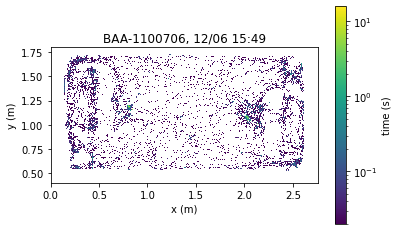

In [214]:
before['title_str'] = f'{session.id}, {session.start:%m/%d %H:%M}'
fig, ax = plotting.positionmap(**before)
fig.patch.set_facecolor('white')